**Example script for direct access of 1 file and produce a simple map**

To run this example you will need the following packages: fsspec , aiohttp, xarray, matplotlib and cartopy. Can be installed via conda with
```shell
conda install -c conda-forge fsspec aiohttp xarray h5netcdf matplotlib cartopy 
```

We do **not recomend** this approach (using fsspec + xarray with h5netcdf engine) to **load/process large amounts of data**.

For loading/processing several files, we recomend to first download the files from the server before using xarray to process the data. 

In [1]:
# Required packages to load data 
import fsspec
import aiohttp
import xarray as xr

# Required packages for ploting 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Open fssepc https filesytem
## Change here your credentials 
## Follow the link "Click here to register" in https://datalsasaf.lsasvcs.ipma.pt/ to create an account 
http_user="user_name"
http_password="password"
fs = fsspec.filesystem('https',client_kwargs={'auth': aiohttp.BasicAuth(http_user, http_password)})

# full path to HTTP file 
url = 'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDSSFTD/NETCDF/2022/08/02/NETCDF4_LSASAF_MSG_MDSSFTD_MSG-Disk_202208021515.nc'
print("file size:",fs.size(url)/1e6,"Mb")    # MB

file size: 4.915507 Mb


In [2]:
# open the files with xarray as a dataset. 
# By using fsspec, only the engine="h5netcdf" works. 
# To use the default xarry netCDF4 engine (e.g to allow opening multiple datasets) you should first download the files to you local computed
ds = xr.open_dataset(fs.open(url),engine='h5netcdf')
print(ds)

<xarray.Dataset>
Dimensions:           (time: 1, lat: 3201, lon: 3201)
Coordinates:
  * lat               (lat) float32 80.0 79.95 79.9 79.85 ... -79.9 -79.95 -80.0
  * lon               (lon) float32 -80.0 -79.95 -79.9 ... 79.9 79.95 80.0
  * time              (time) datetime64[ns] 2022-08-02T15:15:00
Data variables:
    DSSF_TOT          (time, lat, lon) float32 ...
    FRACTION_DIFFUSE  (time, lat, lon) float32 ...
    crs               |S1 ...
    quality_flag      (time, lat, lon) float32 ...
Attributes: (12/27)
    Conventions:                CF-1.6
    algorithm_version:          2.0.0
    archive_facility:           IPMA
    base_algorithm_version:     v1.0.1
    date_created:               2022-08-02T15:34:51Z
    easternmost_longitude:      -80.0
    ...                         ...
    region_name:                MSG-Disk
    sensor:                     SEVI
    southernmost_latitude:      -80.0
    spatial_resolution:          0.05x 0.05
    time_coverage_start:        2022-

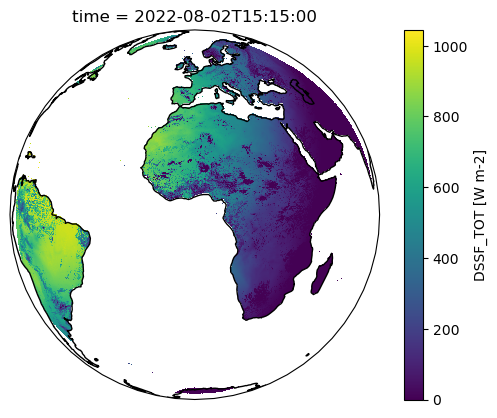

In [4]:
# Create a simple plots of the DSSF_TOT variable 
pvar = ds.DSSF_TOT.isel(time=0)
ax = plt.axes(projection=ccrs.Orthographic(0, 0))  # to use the Orthographic projection 
#ax = plt.axes(projection=ccrs.PlateCarree())      # to use simple lat/lon 
ax.set_global()
pvar.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),interpolation='nearest')
ax.coastlines()

